In [1]:
import random as rd
import numpy as np
import math as mt
from matplotlib import pyplot as plt
import pandas as pd

## Functions

### Lattice Creation

In [2]:
def count(lattice, length):
    n_count = 0
    g_count = 0
    s_count = 0
    t_count = 0
    b_count = 0

    for i in range(length):
        for j in range(length):
            if lattice[j][i] == 0:
                s_count += 1
            elif 1 >= lattice[j][i] >= 0.5:
                t_count += 1
            elif 0.5 > lattice[j][i] > 0:
                g_count += 1
            elif lattice[j][i] > 1:
                n_count += 1
            else:
                b_count += 1  # negative numbers

    m_sum = s_count + t_count + g_count + n_count + b_count
    print("Source:", s_count)
    print("Tolerant: ", t_count)
    print("Gullible: ", g_count)
    # print("Neutral: ", n_count)
    # print("b_count", b_count)
    print("TOTAL", m_sum)
    return


def lattice_initialize(lattice, length, coverage):
    counter = 0  # main counter
    gullible_counter = 0
    tolerant_counter = 0
    maximum = length ** 2 - 1

    max_gullible = maximum * coverage
    max_tolerant = maximum - 1 - max_gullible

    while counter < maximum:
        # guess random position
        xs = rd.choice(range(length))
        ys = rd.choice(range(length))
        v = rd.triangular()
        # print(v, counter, tolerant_counter, gullible_counter, xs, ys)

        if lattice[ys][xs] == 10000:
            if v > 0.5 and tolerant_counter < max_tolerant:
                lattice[ys][xs] = v
                tolerant_counter += 1
                counter += 1
            elif v < 0.5 and gullible_counter < max_gullible:
                lattice[ys][xs] = v
                gullible_counter += 1
                counter += 1

    count(lattice, length)
    np.savetxt("Initial Population " + str(coverage) + ".csv", lattice, delimiter = ",")  # Save init Population to csv
    return lattice


def gullible_counter(lattice, length):
    counter = 0
    for i in range(length):
        for j in range(length):
            if lattice[j][i] < 0.5 and lattice[j][i] != 0:
                counter += 1
    return counter


def count_source(lattice, length):
    counter = 0
    for i in range(length):
        for j in range(length):
            if lattice[j][i] == 0:
                counter += 1
    return counter


def tolerant_counter(lattice, length):
    counter = 0
    for i in range(length):
        for j in range(length):
            if 1 < lattice[j][i] <= 0.5:
                counter += 1
    return counter


### Lattice Update

In [3]:
def main_equation(value, x, y, i, j, multiplier):
    alpha = rd.triangular()
    out = value + multiplier * (-alpha * (1/(mt.sqrt(((x - i)**2 + (y - j)**2)))))
    return out


def update_lattice_equation(lattice, length, initial_n, time, decay_constant):
    for i in range(length):
        for j in range(length):
            if lattice[j][i] == 0:

                multi = initial_n * (mt.exp(-time / decay_constant))
                
                try:  # below the source
                    lattice[j+1][i] = main_equation(lattice[j + 1][i], i, j, i, j+1, multi)
                    # print("1")
                except IndexError:
                    pass

                try:  # above the source
                    lattice[j-1][i] = main_equation(lattice[j + 1][i], i, j, i, j-1, multi)
                    # print("2")
                except IndexError:
                    pass

                try:  # right to the source
                    lattice[j][i+1] = main_equation(lattice[j + 1][i], i, j, i + 1, j, multi)
                    # print("3")
                except IndexError:
                    pass

                try:  # left to the source
                    lattice[j][i-1] = main_equation(lattice[j + 1][i], i, j, i - 1, j, multi)
                    # print("4")
                except IndexError:
                    pass

                try:  # diagonal down and right
                    lattice[j+1][i + 1] = main_equation(lattice[j + 1][i], i, j, i+1, j+1, multi)
                    # print(5)
                except IndexError:
                    pass

                try:  # diagonal down and left
                    lattice[j+1][i-1] = main_equation(lattice[j + 1][i], i, j, i-1, j+1, multi)
                    # print("6")
                except IndexError:
                    pass

                try:  # diagonal up and right
                    lattice[j-1][i+1] = main_equation(lattice[j + 1][i], i, j, i+1, j-1, multi)
                    # print("7")
                except IndexError:
                    pass

                try:  # diagonal up and left
                    lattice[j-1][i-1] = main_equation(lattice[j + 1][i], i, j, i-1, j-1, multi)
                    # print("9")
                except IndexError:
                    pass

    for i in range(length):
        for j in range(length):
            if lattice[j][i] < 0:
                lattice[j][i] = 0

    return lattice


def update_matrix_equation(lattice, decay_constant, initial_n, length, time, x0, y0):  # Equation Based Approach
    multiplier = initial_n * (mt.exp(-time / decay_constant))

    for i in range(length):
        for j in range(length):
            if i != x0 and j != y0:
                alpha = rd.triangular()
                lattice[j][i] = lattice[j][i] + multiplier * (-alpha * 1 / (mt.sqrt(((x0 - i) ** 2 + (y0 - j) ** 2))))

    for i in range(length):
        for j in range(length):
            if lattice[j][i] < 0:
                lattice[j][i] = 0

    return lattice


## Program

In [4]:
decay_const: int = 1
n_0 = 1

### 85% Coverage

In [5]:
source85 = []
gullible85 []
tolerant85 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.85)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source85.append(source_counter)
    tolerant85.append(tolerant_counter)
    gullible85.append(gullible_counter)
    tm += 1
    
    if tm > 200
        if source85[tm-1] == source85[tm-2] and source85[tm-2] == source85[tm-3] and source85[tm-3] == source85[tm-4] and source85[tm-4] == source85[tm-5] and source85[tm-5] == source85[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  1499
Gullible:  8500
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  1499
Gullible:  8500
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  1496
Gullible:  8503
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 8
Tolerant:  1496
Gullible:  8496
TOTAL 10000
--------------------
8 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 12
Tolerant:  1495
Gullible:  8493
TOTAL 10000
--------------------
12 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 34
Tolerant:  1494
Gullible:  8472
TOTAL 10000
--------------------
34 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 59
Tol

-----------------------------------AFTER
Step:  44
Source: 5211
Tolerant:  694
Gullible:  4095
TOTAL 10000
--------------------
5211 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 5461
Tolerant:  661
Gullible:  3878
TOTAL 10000
--------------------
5461 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 5698
Tolerant:  632
Gullible:  3670
TOTAL 10000
--------------------
5698 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 5949
Tolerant:  582
Gullible:  3469
TOTAL 10000
--------------------
5949 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 6224
Tolerant:  535
Gullible:  3241
TOTAL 10000
--------------------
6224 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 6509
Tolerant:  

Source: 8041
Tolerant:  276
Gullible:  1683
TOTAL 10000
--------------------
8041 9000.0 89
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  90
Source: 8059
Tolerant:  276
Gullible:  1665
TOTAL 10000
--------------------
8059 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 8057
Tolerant:  276
Gullible:  1667
TOTAL 10000
--------------------
8057 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 8074
Tolerant:  273
Gullible:  1653
TOTAL 10000
--------------------
8074 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 8087
Tolerant:  272
Gullible:  1641
TOTAL 10000
--------------------
8087 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 8097
Tolerant:  272
Gullible:  1631
TOTAL 10000
-------------------

Source: 8272
Tolerant:  249
Gullible:  1479
TOTAL 10000
--------------------
8272 9000.0 133
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  134
Source: 8276
Tolerant:  248
Gullible:  1476
TOTAL 10000
--------------------
8276 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 8280
Tolerant:  247
Gullible:  1473
TOTAL 10000
--------------------
8280 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 8284
Tolerant:  247
Gullible:  1469
TOTAL 10000
--------------------
8284 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 8288
Tolerant:  247
Gullible:  1465
TOTAL 10000
--------------------
8288 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 8292
Tolerant:  247
Gullible:  1461
TOTAL 10000
---------

-----------------------------------AFTER
Step:  178
Source: 8452
Tolerant:  225
Gullible:  1323
TOTAL 10000
--------------------
8452 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 8456
Tolerant:  225
Gullible:  1319
TOTAL 10000
--------------------
8456 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 8460
Tolerant:  225
Gullible:  1315
TOTAL 10000
--------------------
8460 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 8464
Tolerant:  224
Gullible:  1312
TOTAL 10000
--------------------
8464 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 8468
Tolerant:  224
Gullible:  1308
TOTAL 10000
--------------------
8468 9000.0 182
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  183
Source: 8472


### 80% Coverage

In [6]:
source80 = []
gullible80 = []
tolerant80 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.80)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source80.append(source_counter)
    tolerant80.append(tolerant_counter)
    gullible80.append(gullible_counter)
    tm += 1
    
    if tm > 200:
        if source80[tm-1] == source80[tm-2] and source80[tm-2] == source80[tm-3] and source80[tm-3] == source80[tm-4] and source80[tm-4] == source80[tm-5] and source80[tm-5] == source80[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  1999
Gullible:  8000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  1999
Gullible:  8000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  1997
Gullible:  8002
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 4
Tolerant:  1997
Gullible:  7999
TOTAL 10000
--------------------
4 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 16
Tolerant:  1996
Gullible:  7988
TOTAL 10000
--------------------
16 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 23
Tolerant:  1993
Gullible:  7984
TOTAL 10000
--------------------
23 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 47
Tol

Source: 5084
Tolerant:  959
Gullible:  3957
TOTAL 10000
--------------------
5084 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 5317
Tolerant:  916
Gullible:  3767
TOTAL 10000
--------------------
5317 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 5557
Tolerant:  865
Gullible:  3578
TOTAL 10000
--------------------
5557 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 5798
Tolerant:  822
Gullible:  3380
TOTAL 10000
--------------------
5798 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 6037
Tolerant:  768
Gullible:  3195
TOTAL 10000
--------------------
6037 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 6311
Tolerant:  720
Gullible:  2969
TOTAL 10000
-------------------

-----------------------------------AFTER
Step:  89
Source: 7790
Tolerant:  439
Gullible:  1771
TOTAL 10000
--------------------
7790 9000.0 89
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  90
Source: 7810
Tolerant:  436
Gullible:  1754
TOTAL 10000
--------------------
7810 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7825
Tolerant:  431
Gullible:  1744
TOTAL 10000
--------------------
7825 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7846
Tolerant:  426
Gullible:  1728
TOTAL 10000
--------------------
7846 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7873
Tolerant:  422
Gullible:  1705
TOTAL 10000
--------------------
7873 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 7898
Tolerant:  

Source: 8706
Tolerant:  251
Gullible:  1043
TOTAL 10000
--------------------
8706 9000.0 133
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  134
Source: 8722
Tolerant:  247
Gullible:  1031
TOTAL 10000
--------------------
8722 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 8738
Tolerant:  241
Gullible:  1021
TOTAL 10000
--------------------
8738 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 8754
Tolerant:  238
Gullible:  1008
TOTAL 10000
--------------------
8754 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 8770
Tolerant:  235
Gullible:  995
TOTAL 10000
--------------------
8770 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 8786
Tolerant:  230
Gullible:  984
TOTAL 10000
-----------

-----------------------------------AFTER
Step:  178
Source: 9352
Tolerant:  118
Gullible:  530
TOTAL 10000
--------------------
9352 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 9364
Tolerant:  116
Gullible:  520
TOTAL 10000
--------------------
9364 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 9374
Tolerant:  116
Gullible:  510
TOTAL 10000
--------------------
9374 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 9384
Tolerant:  112
Gullible:  504
TOTAL 10000
--------------------
9384 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 9394
Tolerant:  109
Gullible:  497
TOTAL 10000
--------------------
9394 9000.0 182
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  183
Source: 9404
Toler

### 70% Coverage

In [7]:
source70 = []
gullible70 = []
tolerant70 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.70)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source70.append(source_counter)
    tolerant70.append(tolerant_counter)
    gullible70.append(gullible_counter)
    tm += 1
    
    if tm > 200:
        if source70[tm-1] == source70[tm-2] and source70[tm-2] == source70[tm-3] and source70[tm-3] == source70[tm-4] and source70[tm-4] == source70[tm-5] and source70[tm-5] == source70[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  2999
Gullible:  7000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  2999
Gullible:  7000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 4
Tolerant:  2997
Gullible:  6999
TOTAL 10000
--------------------
4 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 16
Tolerant:  2992
Gullible:  6992
TOTAL 10000
--------------------
16 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 23
Tolerant:  2992
Gullible:  6985
TOTAL 10000
--------------------
23 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 38
Tolerant:  2984
Gullible:  6978
TOTAL 10000
--------------------
38 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 52
T

-----------------------------------AFTER
Step:  44
Source: 5045
Tolerant:  1453
Gullible:  3502
TOTAL 10000
--------------------
5045 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 5263
Tolerant:  1378
Gullible:  3359
TOTAL 10000
--------------------
5263 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 5497
Tolerant:  1322
Gullible:  3181
TOTAL 10000
--------------------
5497 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 5734
Tolerant:  1260
Gullible:  3006
TOTAL 10000
--------------------
5734 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 5968
Tolerant:  1173
Gullible:  2859
TOTAL 10000
--------------------
5968 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 6212
Tolera

-----------------------------------AFTER
Step:  89
Source: 7717
Tolerant:  693
Gullible:  1590
TOTAL 10000
--------------------
7717 9000.0 89
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  90
Source: 7721
Tolerant:  687
Gullible:  1592
TOTAL 10000
--------------------
7721 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7738
Tolerant:  685
Gullible:  1577
TOTAL 10000
--------------------
7738 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7750
Tolerant:  683
Gullible:  1567
TOTAL 10000
--------------------
7750 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7763
Tolerant:  679
Gullible:  1558
TOTAL 10000
--------------------
7763 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 7776
Tolerant:  

-----------------------------------AFTER
Step:  133
Source: 8008
Tolerant:  603
Gullible:  1389
TOTAL 10000
--------------------
8008 9000.0 133
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  134
Source: 8014
Tolerant:  602
Gullible:  1384
TOTAL 10000
--------------------
8014 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 8020
Tolerant:  599
Gullible:  1381
TOTAL 10000
--------------------
8020 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 8026
Tolerant:  595
Gullible:  1379
TOTAL 10000
--------------------
8026 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 8032
Tolerant:  593
Gullible:  1375
TOTAL 10000
--------------------
8032 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 8038


Source: 8256
Tolerant:  518
Gullible:  1226
TOTAL 10000
--------------------
8256 9000.0 177
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  178
Source: 8260
Tolerant:  518
Gullible:  1222
TOTAL 10000
--------------------
8260 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 8262
Tolerant:  518
Gullible:  1220
TOTAL 10000
--------------------
8262 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 8264
Tolerant:  516
Gullible:  1220
TOTAL 10000
--------------------
8264 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 8266
Tolerant:  515
Gullible:  1219
TOTAL 10000
--------------------
8266 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 8268
Tolerant:  514
Gullible:  1218
TOTAL 10000
---------

### 60% Coverage

In [14]:
source60 = []
tolerant60 = []
gullible60 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.60)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source60.append(source_counter)
    tolerant60.append(tolerant_counter)
    gullible60.append(gullible_counter)
    tm += 1
    
    if tm > 200:
        if source60[tm-1] == source60[tm-2] and source60[tm-2] == source60[tm-3] and source60[tm-3] == source60[tm-4] and source60[tm-4] == source60[tm-5] and source60[tm-5] == source60[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  3999
Gullible:  6000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  3999
Gullible:  6000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  3994
Gullible:  6005
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 6
Tolerant:  3994
Gullible:  6000
TOTAL 10000
--------------------
6 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 15
Tolerant:  3992
Gullible:  5993
TOTAL 10000
--------------------
15 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 38
Tolerant:  3988
Gullible:  5974
TOTAL 10000
--------------------
38 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 54
Tol

Source: 4782
Tolerant:  2020
Gullible:  3198
TOTAL 10000
--------------------
4782 9000.0 43
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  44
Source: 4952
Tolerant:  1935
Gullible:  3113
TOTAL 10000
--------------------
4952 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 5197
Tolerant:  1853
Gullible:  2950
TOTAL 10000
--------------------
5197 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 5462
Tolerant:  1765
Gullible:  2773
TOTAL 10000
--------------------
5462 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 5697
Tolerant:  1675
Gullible:  2628
TOTAL 10000
--------------------
5697 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 5955
Tolerant:  1573
Gullible:  2472
TOTAL 10000
-------------

-----------------------------------AFTER
Step:  88
Source: 7702
Tolerant:  920
Gullible:  1378
TOTAL 10000
--------------------
7702 9000.0 88
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  89
Source: 7722
Tolerant:  913
Gullible:  1365
TOTAL 10000
--------------------
7722 9000.0 89
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  90
Source: 7739
Tolerant:  906
Gullible:  1355
TOTAL 10000
--------------------
7739 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7742
Tolerant:  904
Gullible:  1354
TOTAL 10000
--------------------
7742 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7755
Tolerant:  896
Gullible:  1349
TOTAL 10000
--------------------
7755 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7776
Tolerant:  

Source: 8482
Tolerant:  612
Gullible:  906
TOTAL 10000
--------------------
8482 9000.0 132
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  133
Source: 8496
Tolerant:  604
Gullible:  900
TOTAL 10000
--------------------
8496 9000.0 133
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  134
Source: 8510
Tolerant:  595
Gullible:  895
TOTAL 10000
--------------------
8510 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 8524
Tolerant:  589
Gullible:  887
TOTAL 10000
--------------------
8524 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 8538
Tolerant:  582
Gullible:  880
TOTAL 10000
--------------------
8538 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 8552
Tolerant:  576
Gullible:  872
TOTAL 10000
---------------

-----------------------------------AFTER
Step:  177
Source: 9104
Tolerant:  353
Gullible:  543
TOTAL 10000
--------------------
9104 9000.0 177
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  178
Source: 9116
Tolerant:  347
Gullible:  537
TOTAL 10000
--------------------
9116 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 9128
Tolerant:  343
Gullible:  529
TOTAL 10000
--------------------
9128 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 9140
Tolerant:  339
Gullible:  521
TOTAL 10000
--------------------
9140 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 9152
Tolerant:  334
Gullible:  514
TOTAL 10000
--------------------
9152 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 9164
Toler

### 50% Coverage

In [9]:
source50 = []
tolerant50 = []
gullibl50 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.50)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source50.append(source_counter)
    tolerant50.append(tolerant_counter)
    gullible50.append(gullible_counter)
    tm += 1
    
    if tm > 200:
        if source50[tm-1] == source50[tm-2] and source50[tm-2] == source50[tm-3] and source50[tm-3] == source50[tm-4] and source50[tm-4] == source50[tm-5] and source50[tm-5] == source50[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  4999
Gullible:  5000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  4999
Gullible:  5000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 3
Tolerant:  4995
Gullible:  5002
TOTAL 10000
--------------------
3 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 9
Tolerant:  4992
Gullible:  4999
TOTAL 10000
--------------------
9 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 16
Tolerant:  4988
Gullible:  4996
TOTAL 10000
--------------------
16 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 28
Tolerant:  4983
Gullible:  4989
TOTAL 10000
--------------------
28 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 46
Tol

-----------------------------------AFTER
Step:  44
Source: 4569
Tolerant:  2688
Gullible:  2743
TOTAL 10000
--------------------
4569 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 4732
Tolerant:  2585
Gullible:  2683
TOTAL 10000
--------------------
4732 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 4937
Tolerant:  2471
Gullible:  2592
TOTAL 10000
--------------------
4937 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 5161
Tolerant:  2360
Gullible:  2479
TOTAL 10000
--------------------
5161 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 5407
Tolerant:  2252
Gullible:  2341
TOTAL 10000
--------------------
5407 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 5602
Tolera

Source: 7028
Tolerant:  1477
Gullible:  1495
TOTAL 10000
--------------------
7028 9000.0 89
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  90
Source: 7039
Tolerant:  1467
Gullible:  1494
TOTAL 10000
--------------------
7039 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7053
Tolerant:  1459
Gullible:  1488
TOTAL 10000
--------------------
7053 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7072
Tolerant:  1452
Gullible:  1476
TOTAL 10000
--------------------
7072 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7088
Tolerant:  1444
Gullible:  1468
TOTAL 10000
--------------------
7088 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 7093
Tolerant:  1447
Gullible:  1460
TOTAL 10000
-------------

-----------------------------------AFTER
Step:  133
Source: 7348
Tolerant:  1320
Gullible:  1332
TOTAL 10000
--------------------
7348 9000.0 133
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  134
Source: 7354
Tolerant:  1317
Gullible:  1329
TOTAL 10000
--------------------
7354 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 7360
Tolerant:  1313
Gullible:  1327
TOTAL 10000
--------------------
7360 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 7366
Tolerant:  1311
Gullible:  1323
TOTAL 10000
--------------------
7366 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 7372
Tolerant:  1307
Gullible:  1321
TOTAL 10000
--------------------
7372 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 

-----------------------------------AFTER
Step:  177
Source: 7612
Tolerant:  1176
Gullible:  1212
TOTAL 10000
--------------------
7612 9000.0 177
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  178
Source: 7618
Tolerant:  1174
Gullible:  1208
TOTAL 10000
--------------------
7618 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 7624
Tolerant:  1173
Gullible:  1203
TOTAL 10000
--------------------
7624 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 7630
Tolerant:  1171
Gullible:  1199
TOTAL 10000
--------------------
7630 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 7636
Tolerant:  1168
Gullible:  1196
TOTAL 10000
--------------------
7636 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 

### 40% Coverage

In [10]:
source40 = []
tolerant40 = []
gullible40 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.40)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source40.append(source_counter)
    gullible40.append(gullible_counter)
    tolerant40.append(tolerant_counter)
    tm += 1
    
    if tm > 200:
        if source40[tm-1] == source40[tm-2] and source40[tm-2] == source40[tm-3] and source40[tm-3] == source40[tm-4] and source40[tm-4] == source40[tm-5] and source40[tm-5] == source40[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  5999
Gullible:  4000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  5999
Gullible:  4000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  5995
Gullible:  4004
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 1
Tolerant:  5994
Gullible:  4005
TOTAL 10000
--------------------
1 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 2
Tolerant:  5994
Gullible:  4004
TOTAL 10000
--------------------
2 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 9
Tolerant:  5994
Gullible:  3997
TOTAL 10000
--------------------
9 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 12
Toleran

Source: 4189
Tolerant:  3425
Gullible:  2386
TOTAL 10000
--------------------
4189 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 4383
Tolerant:  3296
Gullible:  2321
TOTAL 10000
--------------------
4383 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 4585
Tolerant:  3155
Gullible:  2260
TOTAL 10000
--------------------
4585 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 4785
Tolerant:  3025
Gullible:  2190
TOTAL 10000
--------------------
4785 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 5010
Tolerant:  2907
Gullible:  2083
TOTAL 10000
--------------------
5010 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 5243
Tolerant:  2777
Gullible:  1980
TOTAL 10000
-------------

-----------------------------------AFTER
Step:  90
Source: 7114
Tolerant:  1737
Gullible:  1149
TOTAL 10000
--------------------
7114 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7124
Tolerant:  1734
Gullible:  1142
TOTAL 10000
--------------------
7124 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7136
Tolerant:  1731
Gullible:  1133
TOTAL 10000
--------------------
7136 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7152
Tolerant:  1724
Gullible:  1124
TOTAL 10000
--------------------
7152 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 7157
Tolerant:  1716
Gullible:  1127
TOTAL 10000
--------------------
7157 9000.0 94
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  95
Source: 7161
Tolera

-----------------------------------AFTER
Step:  135
Source: 7734
Tolerant:  1373
Gullible:  893
TOTAL 10000
--------------------
7734 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 7746
Tolerant:  1364
Gullible:  890
TOTAL 10000
--------------------
7746 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 7758
Tolerant:  1354
Gullible:  888
TOTAL 10000
--------------------
7758 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 7770
Tolerant:  1346
Gullible:  884
TOTAL 10000
--------------------
7770 9000.0 138
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  139
Source: 7782
Tolerant:  1339
Gullible:  879
TOTAL 10000
--------------------
7782 9000.0 139
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  140
Source: 7794


Source: 8262
Tolerant:  1057
Gullible:  681
TOTAL 10000
--------------------
8262 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 8274
Tolerant:  1047
Gullible:  679
TOTAL 10000
--------------------
8274 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 8286
Tolerant:  1040
Gullible:  674
TOTAL 10000
--------------------
8286 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 8298
Tolerant:  1032
Gullible:  670
TOTAL 10000
--------------------
8298 9000.0 182
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  183
Source: 8308
Tolerant:  1024
Gullible:  668
TOTAL 10000
--------------------
8308 9000.0 183
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  184
Source: 8318
Tolerant:  1021
Gullible:  661
TOTAL 10000
---------

-----------------------------------AFTER
Step:  224
Source: 8500
Tolerant:  908
Gullible:  592
TOTAL 10000
--------------------
8500 9000.0 224
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  225
Source: 8500
Tolerant:  908
Gullible:  592
TOTAL 10000
--------------------
8500 9000.0 225
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  226
Source: 8500
Tolerant:  908
Gullible:  592
TOTAL 10000
--------------------
8500 9000.0 226
END----------------------------

Source: 8500
Tolerant:  908
Gullible:  592
TOTAL 10000

Step END:  227


### 30% Coverage

In [11]:
source30 = []
tolerant30 = []
gullible30 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.30)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source30.append(source_counter)
    gullible30.append(gullible_counter)
    tolerant30.append(tolerant_counter)
    tm += 1
    
    if tm > 200:
        if source30[tm-1] == source30[tm-2] and source30[tm-2] == source30[tm-3] and source30[tm-3] == source30[tm-4] and source30[tm-4] == source30[tm-5] and source30[tm-5] == source30[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  6999
Gullible:  3000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  6999
Gullible:  3000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  6991
Gullible:  3008
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 1
Tolerant:  6991
Gullible:  3008
TOTAL 10000
--------------------
1 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 1
Tolerant:  6991
Gullible:  3008
TOTAL 10000
--------------------
1 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 7
Tolerant:  6991
Gullible:  3002
TOTAL 10000
--------------------
7 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 12
Toleran

-----------------------------------AFTER
Step:  45
Source: 4234
Tolerant:  3961
Gullible:  1805
TOTAL 10000
--------------------
4234 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 4437
Tolerant:  3820
Gullible:  1743
TOTAL 10000
--------------------
4437 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 4629
Tolerant:  3654
Gullible:  1717
TOTAL 10000
--------------------
4629 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 4851
Tolerant:  3518
Gullible:  1631
TOTAL 10000
--------------------
4851 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 5061
Tolerant:  3372
Gullible:  1567
TOTAL 10000
--------------------
5061 9000.0 49
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  50
Source: 5318
Tolera

-----------------------------------AFTER
Step:  90
Source: 6998
Tolerant:  2096
Gullible:  906
TOTAL 10000
--------------------
6998 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 7005
Tolerant:  2087
Gullible:  908
TOTAL 10000
--------------------
7005 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 7021
Tolerant:  2078
Gullible:  901
TOTAL 10000
--------------------
7021 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 7030
Tolerant:  2066
Gullible:  904
TOTAL 10000
--------------------
7030 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 7043
Tolerant:  2058
Gullible:  899
TOTAL 10000
--------------------
7043 9000.0 94
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  95
Source: 7058
Tolerant:  

-----------------------------------AFTER
Step:  134
Source: 7715
Tolerant:  1593
Gullible:  692
TOTAL 10000
--------------------
7715 9000.0 134
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  135
Source: 7735
Tolerant:  1579
Gullible:  686
TOTAL 10000
--------------------
7735 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 7758
Tolerant:  1566
Gullible:  676
TOTAL 10000
--------------------
7758 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 7773
Tolerant:  1549
Gullible:  678
TOTAL 10000
--------------------
7773 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 7796
Tolerant:  1536
Gullible:  668
TOTAL 10000
--------------------
7796 9000.0 138
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  139
Source: 7819


-----------------------------------AFTER
Step:  178
Source: 8532
Tolerant:  1057
Gullible:  411
TOTAL 10000
--------------------
8532 9000.0 178
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  179
Source: 8548
Tolerant:  1045
Gullible:  407
TOTAL 10000
--------------------
8548 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 8564
Tolerant:  1035
Gullible:  401
TOTAL 10000
--------------------
8564 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 8580
Tolerant:  1025
Gullible:  395
TOTAL 10000
--------------------
8580 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 8596
Tolerant:  1013
Gullible:  391
TOTAL 10000
--------------------
8596 9000.0 182
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  183
Source: 8612


-----------------------------------AFTER
Step:  223
Source: 9068
Tolerant:  669
Gullible:  263
TOTAL 10000
--------------------
9068 9000.0 223
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  224
Source: 9074
Tolerant:  664
Gullible:  262
TOTAL 10000
--------------------
9074 9000.0 224
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  225
Source: 9078
Tolerant:  662
Gullible:  260
TOTAL 10000
--------------------
9078 9000.0 225
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  226
Source: 9082
Tolerant:  660
Gullible:  258
TOTAL 10000
--------------------
9082 9000.0 226
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  227
Source: 9084
Tolerant:  658
Gullible:  258
TOTAL 10000
--------------------
9084 9000.0 227
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  228
Source: 9086
Toler

### 20% Coverage

In [12]:
source20 = []
gullible20 = []
tolerant20 = []
check = True
step = 0
n = 100    # length of the matrix
N = np.full(shape=(n, n), fill_value=10000, dtype=np.float32)  # creates matrix will all values having 10000
tm = 0  # time

source_counter = 0
max_source = (n**2) * 0.9  # stopping criteria

xs = 50
ys = 50

# xs = rd.choice(range(n))  # initial x and y for the source, (value == 0)
# ys = rd.choice(range(n))

N[ys][xs] = 0
print(xs, ys)

print("------------------------------A")
lattice_initialize(N, n, 0.20)  # Initializes the population to have 1/3 of each type of persons
print("------------------------------B")

count(N, n)
while check == True:
    print("-----------------------------------BEFORE")
    update_lattice_equation(N, n, n_0, 1, decay_const)
    source_counter = count_source(N, n)
    print("-----------------------------------AFTER")
    print("Step: ", tm)
    count(N, n)
    print("--------------------")
    print(source_counter, max_source, tm)
    source20.append(source_counter)
    tolerant20.append(tolerant_counter)
    gullible20.append(gullible_counter)
    tm += 1
    
    if tm > 200:
        if source20[tm-1] == source20[tm-2] and source20[tm-2] == source20[tm-3] and source20[tm-3] == source20[tm-4] and source20[tm-4] == source20[tm-5] and source20[tm-5] == source20[tm-6]:
            check = False
    
np.savetxt("Final Population.csv", N, delimiter = ",")
print("END----------------------------")
print()
count(N, n)
print()
print("Step END: ", tm)

50 50
------------------------------A
Source: 1
Tolerant:  7999
Gullible:  2000
TOTAL 10000
------------------------------B
Source: 1
Tolerant:  7999
Gullible:  2000
TOTAL 10000
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  0
Source: 1
Tolerant:  7998
Gullible:  2001
TOTAL 10000
--------------------
1 9000.0 0
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  1
Source: 1
Tolerant:  7996
Gullible:  2003
TOTAL 10000
--------------------
1 9000.0 1
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  2
Source: 1
Tolerant:  7993
Gullible:  2006
TOTAL 10000
--------------------
1 9000.0 2
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  3
Source: 1
Tolerant:  7993
Gullible:  2006
TOTAL 10000
--------------------
1 9000.0 3
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  4
Source: 7
Tolerant

Source: 3681
Tolerant:  4934
Gullible:  1385
TOTAL 10000
--------------------
3681 9000.0 44
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  45
Source: 3854
Tolerant:  4805
Gullible:  1341
TOTAL 10000
--------------------
3854 9000.0 45
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  46
Source: 4058
Tolerant:  4640
Gullible:  1302
TOTAL 10000
--------------------
4058 9000.0 46
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  47
Source: 4223
Tolerant:  4484
Gullible:  1293
TOTAL 10000
--------------------
4223 9000.0 47
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  48
Source: 4431
Tolerant:  4332
Gullible:  1237
TOTAL 10000
--------------------
4431 9000.0 48
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  49
Source: 4664
Tolerant:  4165
Gullible:  1171
TOTAL 10000
-------------

-----------------------------------AFTER
Step:  90
Source: 6602
Tolerant:  2690
Gullible:  708
TOTAL 10000
--------------------
6602 9000.0 90
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  91
Source: 6614
Tolerant:  2684
Gullible:  702
TOTAL 10000
--------------------
6614 9000.0 91
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  92
Source: 6617
Tolerant:  2675
Gullible:  708
TOTAL 10000
--------------------
6617 9000.0 92
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  93
Source: 6625
Tolerant:  2667
Gullible:  708
TOTAL 10000
--------------------
6625 9000.0 93
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  94
Source: 6629
Tolerant:  2659
Gullible:  712
TOTAL 10000
--------------------
6629 9000.0 94
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  95
Source: 6640
Tolerant:  

-----------------------------------AFTER
Step:  135
Source: 7153
Tolerant:  2268
Gullible:  579
TOTAL 10000
--------------------
7153 9000.0 135
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  136
Source: 7166
Tolerant:  2259
Gullible:  575
TOTAL 10000
--------------------
7166 9000.0 136
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  137
Source: 7179
Tolerant:  2250
Gullible:  571
TOTAL 10000
--------------------
7179 9000.0 137
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  138
Source: 7192
Tolerant:  2238
Gullible:  570
TOTAL 10000
--------------------
7192 9000.0 138
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  139
Source: 7205
Tolerant:  2226
Gullible:  569
TOTAL 10000
--------------------
7205 9000.0 139
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  140
Source: 7218


Source: 7628
Tolerant:  1879
Gullible:  493
TOTAL 10000
--------------------
7628 9000.0 179
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  180
Source: 7638
Tolerant:  1871
Gullible:  491
TOTAL 10000
--------------------
7638 9000.0 180
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  181
Source: 7648
Tolerant:  1864
Gullible:  488
TOTAL 10000
--------------------
7648 9000.0 181
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  182
Source: 7658
Tolerant:  1855
Gullible:  487
TOTAL 10000
--------------------
7658 9000.0 182
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  183
Source: 7668
Tolerant:  1848
Gullible:  484
TOTAL 10000
--------------------
7668 9000.0 183
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  184
Source: 7678
Tolerant:  1840
Gullible:  482
TOTAL 10000
---------

-----------------------------------AFTER
Step:  224
Source: 7890
Tolerant:  1671
Gullible:  439
TOTAL 10000
--------------------
7890 9000.0 224
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  225
Source: 7892
Tolerant:  1671
Gullible:  437
TOTAL 10000
--------------------
7892 9000.0 225
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  226
Source: 7894
Tolerant:  1669
Gullible:  437
TOTAL 10000
--------------------
7894 9000.0 226
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  227
Source: 7896
Tolerant:  1667
Gullible:  437
TOTAL 10000
--------------------
7896 9000.0 227
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  228
Source: 7898
Tolerant:  1665
Gullible:  437
TOTAL 10000
--------------------
7898 9000.0 228
-----------------------------------BEFORE
-----------------------------------AFTER
Step:  229
Source: 7900


### Results

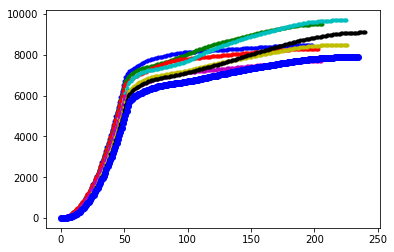

In [13]:
plt.plot(range(len(source85)), source85, 'b.-')
plt.plot(range(len(source80)), source80, 'g.-')
plt.plot(range(len(source70)), source70, 'r.-')
plt.plot(range(len(source60)), source60, 'c.-')
plt.plot(range(len(source50)), source50, 'm.-')
plt.plot(range(len(source40)), source40, 'y.-')
plt.plot(range(len(source30)), source30, 'k.-')
plt.plot(range(len(source20)), source20, 'bo-')

In [ ]:
plt.plot(range(len(tolerant85)), tolerant85, 'b.-')
plt.plot(range(len(tolerant80)), tolerant80, 'g.-')
plt.plot(range(len(tolerant70)), tolerant70, 'r.-')
plt.plot(range(len(tolerant60)), tolerant60, 'c.-')
plt.plot(range(len(tolerant50)), tolerant50, 'm.-')
plt.plot(range(len(tolerant40)), tolerant40, 'y.-')
plt.plot(range(len(tolerant30)), tolerant30, 'k.-')
plt.plot(range(len(tolerant20)), tolerant20, 'bo-')

In [ ]:
plt.plot(range(len(gullible85)), gullible85, 'b.-')
plt.plot(range(len(gullible80)), gullible80, 'g.-')
plt.plot(range(len(gullible70)), gullible70, 'r.-')
plt.plot(range(len(gullible60)), gullible60, 'c.-')
plt.plot(range(len(gullible50)), gullible50, 'm.-')
plt.plot(range(len(gullible40)), gullible40, 'y.-')
plt.plot(range(len(gullible30)), gullible30, 'k.-')
plt.plot(range(len(gullible20)), gullible20, 'bo-')